# Continuous Cartpole

We are going to solve a continuous **Cart-Pole** task with **REINFORCE**.

We are going to use *gym* for simulation and *potion* for learning.

*potion* is based on *pytorch*.

In [1]:
import gym
import torch

### Import the custom environments
A custom environment is a class extending `gym.Env` (e.g. `potion.envs.cartpole.ContCartPole`).

The custom environments must be registered (see the *\_\_init\_\_.py* of `potion.envs`).

At registration, each environment is assigned an id of the form "Name-vx", where x denotes the version number.

The following `import` runs the registration code:

In [2]:
import potion.envs

### Create the environment
The environment is created using the id assigned at registration.

We are going to load a custom continuous variant of the popular Cart-Pole problem:

In [3]:
env = gym.make('ContCartPole-v0')

The state is 4-dimensional, while the action is a scalar:

In [4]:
state_dim = sum(env.observation_space.shape) #dimensionality of the state space
action_dim = sum(env.action_space.shape) #dimensionality of the action space
(state_dim, action_dim)

(4, 1)

The environment has indefinite horizon. For practical reasons, we are going to set a finite maximum horizon:

In [5]:
horizon = 500 #maximum length of a trajectory

We also have to define the discount factor separately:

In [6]:
gamma = 1.

### Prepare the policy
We are going to optimize the mean parameters of a shallow Gaussian policy.

In [7]:
from potion.actors.continuous_policies import ShallowGaussianPolicy

We set the standard devation to 1.0 and initialize the mean parameters with a tensor of zeros:

In [8]:
policy = ShallowGaussianPolicy(state_dim, #input size
                               action_dim, #output size
                               mu_init = torch.zeros(4), #initial mean parameters
                               logstd_init = 0., #log of standard deviation
                               learn_std = False #We are NOT going to learn the variance parameter
                              ) 

The policy is just a stochastic mapping from state to actions:

In [9]:
state = torch.ones(4)
policy.act(state)

tensor([1.7598])

The policies parameters are represented as a 1-dimensional tensor:

In [10]:
policy.get_flat()

tensor([0., 0., 0., 0.])

### Run the algorithm
We are going to run the **REINFORCE** algorithm:

In [11]:
from potion.algorithms.reinforce import reinforce

We use a constant step size and a constant batch size:

In [12]:
from potion.meta.steppers import ConstantStepper
stepper = ConstantStepper(0.05)

batchsize = 100

We set up a logger to save learning statistics:

In [13]:
from potion.common.logger import Logger

log_dir = '../logs'
log_name = 'REINFORCE'
logger = Logger(directory=log_dir, name = log_name)

We set a random seed to make the experiment fully reproducible (`seed = None` would make it truly random).

We need to apply the random seed to the environment *and* to the learning algorithm

In [14]:
seed = 42

env.seed(seed)

[42]

Now we run the algorithm. It will take some time. 

You can also monitor its progress with [tensorboard](https://www.tensorflow.org/guide/summaries_and_tensorboard). Event files are saved in the log directory.

In [15]:
policy.set_from_flat(torch.zeros(4)) #Reset the policy (in case is run multiple times)

reinforce(env = env, 
          policy = policy,
          horizon = horizon,
          stepper = stepper,
          batchsize = batchsize,
          disc = gamma,
          iterations = 75,
          seed = 42,
          logger = logger,
          save_params = 5, #Policy parameters will be saved on disk each 5 iterations
          shallow = True, #Use optimized code for shallow policies
          estimator = 'gpomdp', #Use the G(PO)MDP refined estimator
          baseline = 'peters' #Use Peter's variance-minimizing baseline
         )


Iteration  0
Perf :	 37.130001068115234
UPerf :	 37.130001068115234
AvgHorizon :	 37.130001068115234
StepSize :	 0.05000000074505806
GradNorm :	 4.362085342407227
Time :	 0.6994857788085938
Info :	 0.0

Iteration  1
Perf :	 42.72999954223633
UPerf :	 42.72999954223633
AvgHorizon :	 42.72999954223633
StepSize :	 0.05000000074505806
GradNorm :	 7.899115562438965
Time :	 0.8924770355224609
Info :	 0.0

Iteration  2
Perf :	 43.08000183105469
UPerf :	 43.08000183105469
AvgHorizon :	 43.08000183105469
StepSize :	 0.05000000074505806
GradNorm :	 5.90723991394043
Time :	 0.9039731025695801
Info :	 0.0

Iteration  3
Perf :	 45.439998626708984
UPerf :	 45.439998626708984
AvgHorizon :	 45.439998626708984
StepSize :	 0.05000000074505806
GradNorm :	 2.739244222640991
Time :	 1.114927053451538
Info :	 0.0

Iteration  4
Perf :	 42.380001068115234
UPerf :	 42.380001068115234
AvgHorizon :	 42.380001068115234
StepSize :	 0.05000000074505806
GradNorm :	 2.177741527557373
Time :	 0.8685910701751709
Info 

Perf :	 479.2099914550781
UPerf :	 479.2099914550781
AvgHorizon :	 479.2099914550781
StepSize :	 0.05000000074505806
GradNorm :	 65.21803283691406
Time :	 7.793630123138428
Info :	 0.0

Iteration  42
Perf :	 297.82000732421875
UPerf :	 297.82000732421875
AvgHorizon :	 297.82000732421875
StepSize :	 0.05000000074505806
GradNorm :	 53.923126220703125
Time :	 5.173304080963135
Info :	 0.0

Iteration  43
Perf :	 500.0
UPerf :	 500.0
AvgHorizon :	 500.0
StepSize :	 0.05000000074505806
GradNorm :	 0.0
Time :	 9.51438570022583
Info :	 0.0

Iteration  44
Perf :	 500.0
UPerf :	 500.0
AvgHorizon :	 500.0
StepSize :	 0.05000000074505806
GradNorm :	 0.0
Time :	 9.871348857879639
Info :	 0.0

Iteration  45
Perf :	 500.0
UPerf :	 500.0
AvgHorizon :	 500.0
StepSize :	 0.05000000074505806
GradNorm :	 0.0
Time :	 9.516822099685669
Info :	 0.0

Iteration  46
Perf :	 500.0
UPerf :	 500.0
AvgHorizon :	 500.0
StepSize :	 0.05000000074505806
GradNorm :	 0.0
Time :	 8.707753658294678
Info :	 0.0

Iteration  

### Visualize the results

In [16]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

The data for this experiment are saved as a *csv* file in the logger's directory.

The *csv* file's name is the logger's name plus a unique timestamp, to distinguish it from other runs of the same experiment

We load the data of each experiment in a separate pandas dataframe

In [17]:
os.chdir(log_dir) #Change directory 
runs = [pd.read_csv(file, index_col=False) 
          for file in glob.glob("*.csv") if file.startswith(log_name + '_')]

In this case we just have one run. We plot the average performance per iteration.

Normally, results are averaged over several (>= 5) runs (each with a different random seed) and confidence intervals are reported as shaded areas.

Text(0,0.5,'Performance')

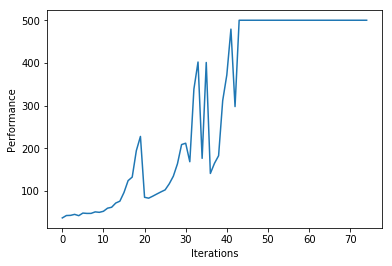

In [18]:
run = runs[0]
performance = run['Perf']
plt.plot(range(len(performance)), performance)
plt.xlabel('Iterations')
plt.ylabel('Performance')

The optimal performance for this task (500) was achieved, although large oscillations happened during the learning phase.

### Retrieve the learned parameters
These are the final policy parameters learned by the algorithm:

In [19]:
policy.get_flat()

tensor([-0.4193,  4.6197, 10.9384, 16.7262])

Intermediate parameters have also been saved as torch tensors inside the log directory. This can be useful to restore an aborted experiment.

### Observe the learned behavior

It is good practice to observe the behavior the agent has actually learned:

In [23]:
from potion.simulation.play import play

play(env, policy, horizon, episodes=1)

### Cleanup

In [24]:
env.viewer.close()
env.close()